In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df_shape = df.shape
print("No. of Rows:", df_shape[0])
print("No. of Columns:", df_shape[1])

No. of Rows: 119390
No. of Columns: 32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.duplicated().sum()

31994

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(87396, 32)

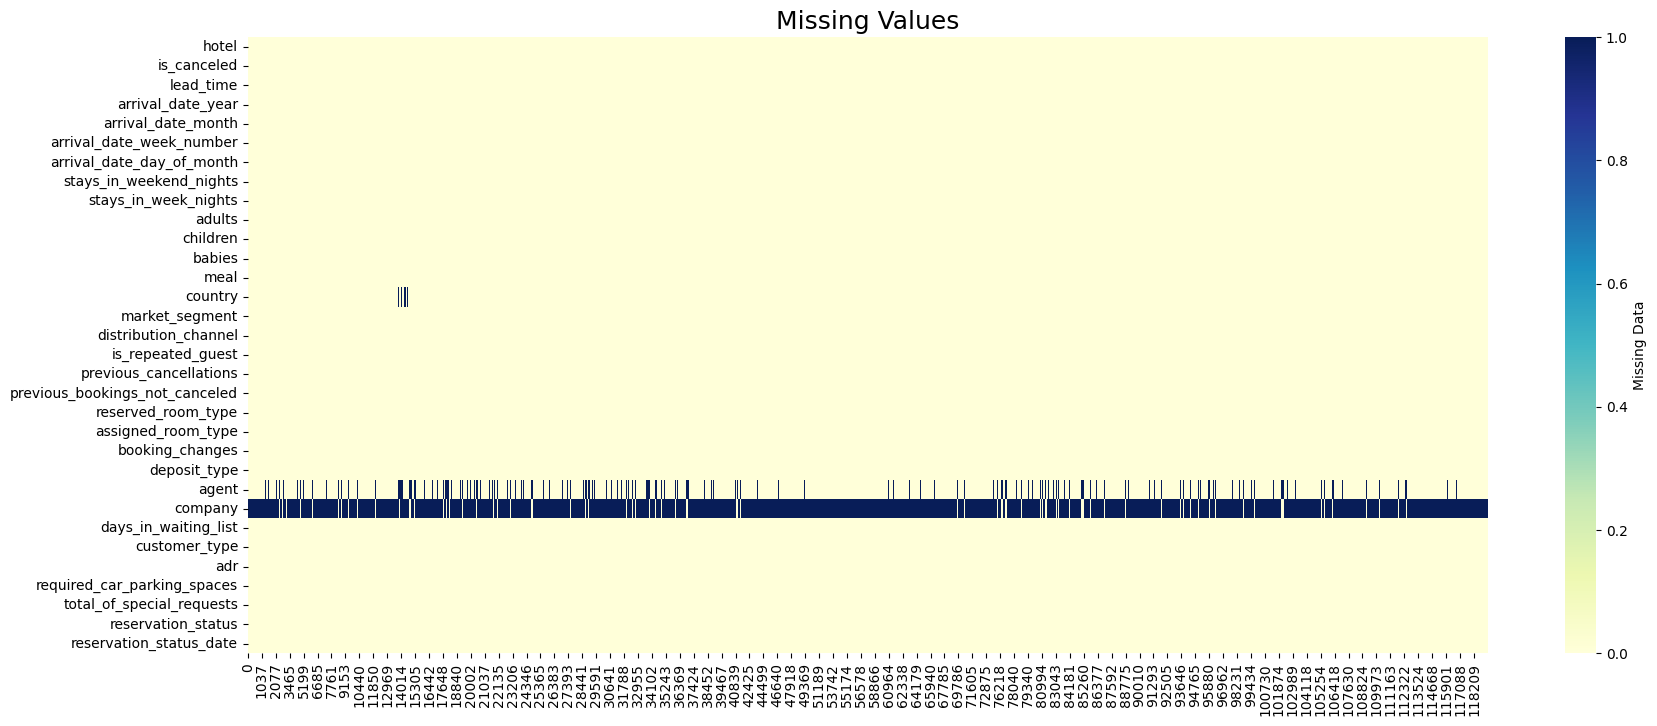

In [10]:
# Visualizing the missing values using Seaborn heatmap

plt.figure(figsize=(20, 8))
sb.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=18)
plt.show()

# About the Dataset

#### No. of Rows and Columns

    Rows: 119390
    Columns: 32

#### There are four columns with missing/null values - company, agent, country, children

    1. In company and agent column, will replace null values with 0 assuming that customer did not book hotel through them.
    2. In children column, will replace null values with 0 assuming that customer did not have any children.
    3. In country column, will replace null values with 'Others' assuming customer's country was not mentioned while booking.


In [11]:
# Creating the copy of original dataset before making any changes to it 

hb_df = df.copy()
hb_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
hb_df['company'].fillna(0, inplace=True)
hb_df['agent'].fillna(0, inplace=True)
hb_df['children'].fillna(0, inplace=True)
hb_df['country'].fillna('Others', inplace=True)
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
hb_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [14]:
for column in hb_df.columns:
    unique_values = hb_df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in 'is_canceled': [0 1]
Unique values in 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192


In [15]:
# Dropping the company column as it contains a lot of null values in comparison to other columns 

hb_df.drop(['company'], axis=1, inplace=True) # dropping the values vertically at axis 1 (columns)

In [16]:
hb_df.shape

(87396, 31)

In [17]:
# Dropping all rows where no adults, children and babies are available because no booking were made that day

no_guest = hb_df[hb_df['adults'] + hb_df['children'] + hb_df['babies'] == 0]
hb_df.drop(no_guest.index, inplace=True)

In [18]:
hb_df.shape

(87230, 31)

In [19]:
# Adding some new columns to make the data analysis ready.

hb_df['total_people'] = hb_df['adults'] + hb_df['children'] + hb_df['babies'] # Head Count
hb_df['total_stay'] = hb_df['stays_in_weekend_nights'] + hb_df['stays_in_week_nights'] # Total stay by people in that booking

In [20]:
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [21]:
pd.Series({col: hb_df[col].unique() for col in hb_df})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

## Data Preparation and Cleaning:

Created a copy of the original dataset before performing any manipulations to preserve the raw data.

### Handled missing values:

- Filled missing values in 'children', 'company', and 'agent' columns with 0 as they represent numerical data.

- Filled missing values in the 'country' column with 'Others' to ensure categorical consistency.

- Dropped the 'country' column after filling, as it had approximately 96% missing values and provided minimal value for analysis.

- Engineered two new columns for enhanced analysis:  
   'total_people': Sum of 'babies', 'children', and 'adults' columns.  
   'total_stay': Sum of 'stays_in_weekend_nights' and 'stays_in_week_nights' columns.
- Conducted a final review of the cleaned dataset to confirm readiness for analysis.

### Insights Identified from the Manipulated Dataset:

1. The dataset includes two types of hotels, enabling analysis of booking preferences by hotel type.

2. Guests originate from multiple countries, offering insights into international customer demographics.

3. Guests have various meal options to choose from, allowing exploration of food preferences.

4. Bookings are made either directly or through multiple distribution channels, useful for channel performance evaluation.

5. Booking data includes cancellations and repeat guests, helping assess customer loyalty and cancellation rates.

6. Guests can select different room types during booking, providing data on room preference trends.

7. The 'adr' (Average Daily Rate) column is available and can be used to evaluate hotel performance and revenue metrics.


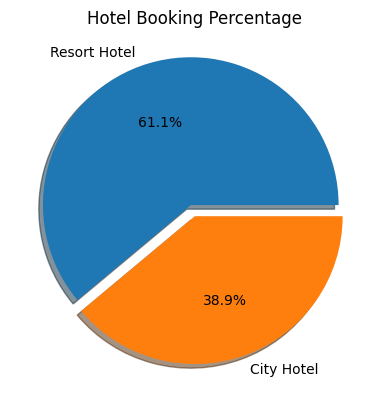

In [22]:
# Chart - 1 Visualizing Code 

# Storing unique hotel names in a variable
hotel_names = hb_df['hotel'].unique()

# Check the number of unique booking in each hotel type 
unique_booking = hb_df.hotel.value_counts()

# Pie Chart
values = unique_booking
labels = hotel_names
plt.pie(values, labels=labels, shadow=True, explode=[0.08,0], autopct='%1.1f%%')
plt.title('Hotel Booking Percentage')
plt.show()

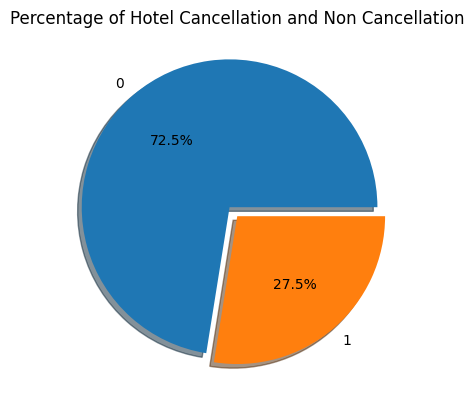

In [23]:
# Chart - 2 Visualizing Code

# Storing unique hotel names in a variable
yes_no = hb_df['is_canceled'].unique()

# Extracting and storing unique values of hotel cancellation
cancelled_hotel = hb_df['is_canceled'].value_counts()

# Creating pie chart
plt.pie(cancelled_hotel, labels=yes_no, shadow=True, explode=[0.08,0], autopct='%1.1f%%')
plt.title('Percentage of Hotel Cancellation and Non Cancellation')
plt.show()

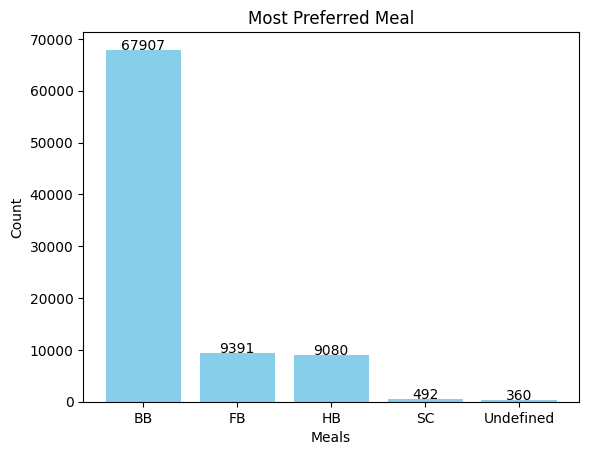

In [44]:
# Chart - 2 Visualizing Code

# Extracting each meal type and storing in a variable 
meal_name = hb_df['meal'].unique()

# Counting each meal type
meal_count = hb_df['meal']. value_counts()

# Creating a dataset of each meal type and count 
meal_df = pd.DataFrame(zip(meal_name, meal_count), columns=['meal_name', 'meal_count'])

# Create the bar chart
plt.bar(meal_name, meal_count, color='skyblue')

# Add labels and title
plt.xlabel('Meals')
plt.ylabel('Count')
plt.title('Most Preferred Meal')

# Adding annotations
for i, value in enumerate(meal_count):
    plt.text(i, value, str(value), ha='center')

# Display the chart
plt.show()


Meal type variable description:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

**1. Why did you pick the specific chart?  **
There were 4 values to compare and Bar graphs are used to compare things between different groups that is why I used this chart.

2. What is/are the insight(s) found from the chart?  
After visualizing the above chart we can see that BB - (Bed and Breakfast) is the most preffered meal type by guests.

3. Will the gained insights help creating a positive business impact?  
Are there any insights that lead to negative growth? Justify with specific reason.  

Yes, from the gained insight above now stakeholders know that BB(Bed and Breakfast) is most preferred meal type so they can arrange raw material for this meal in advance and deliver the meal without any delay.

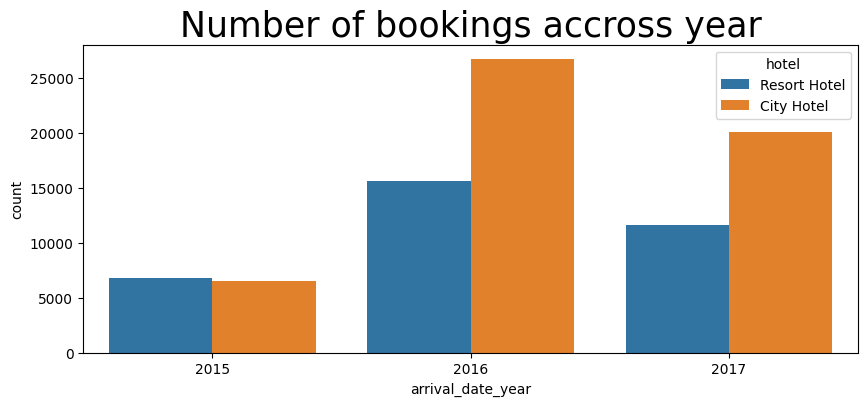

In [25]:
# Chart - 4 vishualization chart
# Plotting with count plot

plt.figure(figsize=(10,4))
sb.countplot(x=hb_df['arrival_date_year'], hue=hb_df['hotel'])
plt.title("Number of bookings accross year", fontsize=25)
plt.show()

1. Why did you pick specific chart?

Bar graphs are used to compare things between different groups that is why I used this chart.

2. What is/are the insight(s) found from the chart?

From above insight I found that hotel was booked most times in year 2016.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above insights shows that number of booking was declined after year 2016. Stakeholders can know what went wrong after 2016 and fix that problem to increase the number of bookings. One  way to do this is ask for feedbacks from guests and have a meeting with old employees who else were serving in the year 2016.


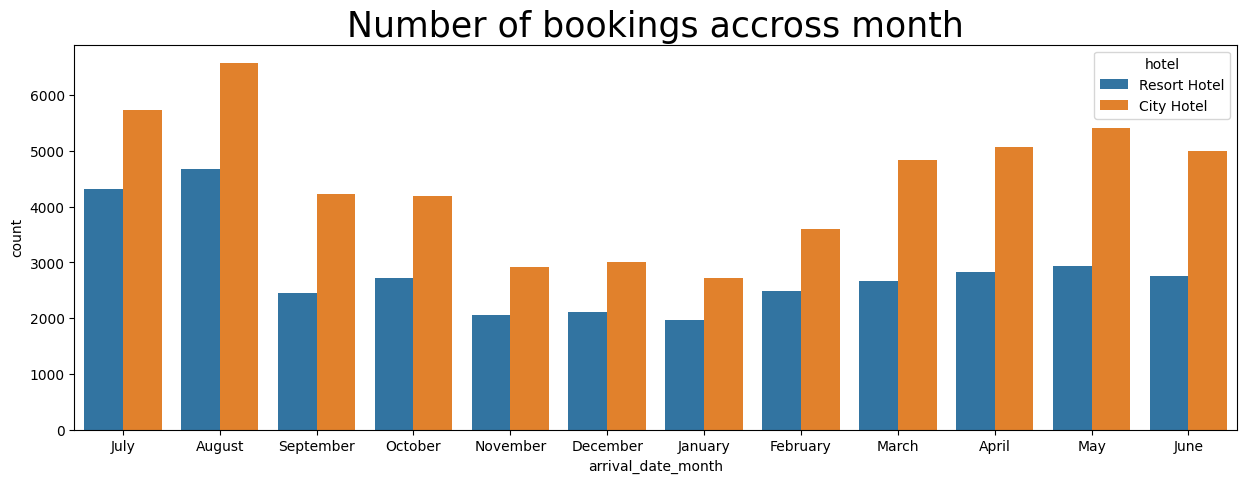

In [26]:
# Chart - 5 vishualization code

plt.figure(figsize=(15,5))
sb.countplot(x=hb_df['arrival_date_month'], hue=hb_df['hotel'])
plt.title("Number of bookings accross month", fontsize=25)
plt.show()

1. Why did you pick specific chart?

Bar graphs are used to compare things between different groups that is why I used this chart.

2. What is/are the insight(s) found from the chart?

From above insight I found that August and July were 2 most busy months in compare to others.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is negative insight but hotel can use this insight to arrange everything in advance and welcome their guests in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

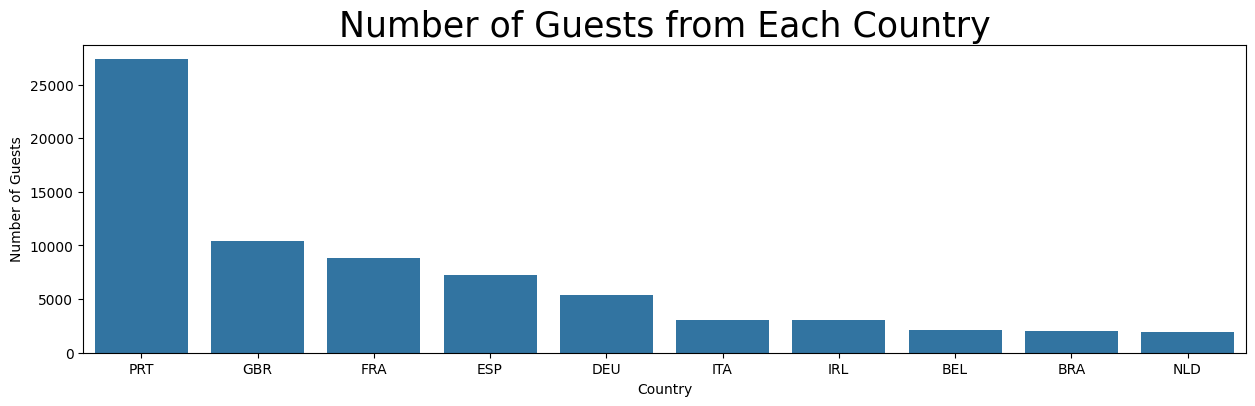

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

# Count the number of guests from each country and rename columns
country_df = hb_df['country'].value_counts().reset_index()
country_df.columns = ['country', 'guests_count']  # Rename columns properly
country_df = country_df.head(10)  # Get top 10 countries

# Plotting the bar chart
plt.figure(figsize=(15, 4))
sb.barplot(x='country', y='guests_count', data=country_df)
plt.title("Number of Guests from Each Country", fontsize=25)
plt.xlabel("Country")
plt.ylabel("Number of Guests")
plt.show()


1. Why did you pick the specific chart?
Here I comapred different values that's why I used bar chart.

2. What is/are the insight(s) found from the chart?
From the above chart I found out that most guests come from PRT(Portugal).

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight. After knowing that most of the guests come from Portugal Hotels can add more Portugal cousines in their menu to make guests order more food.

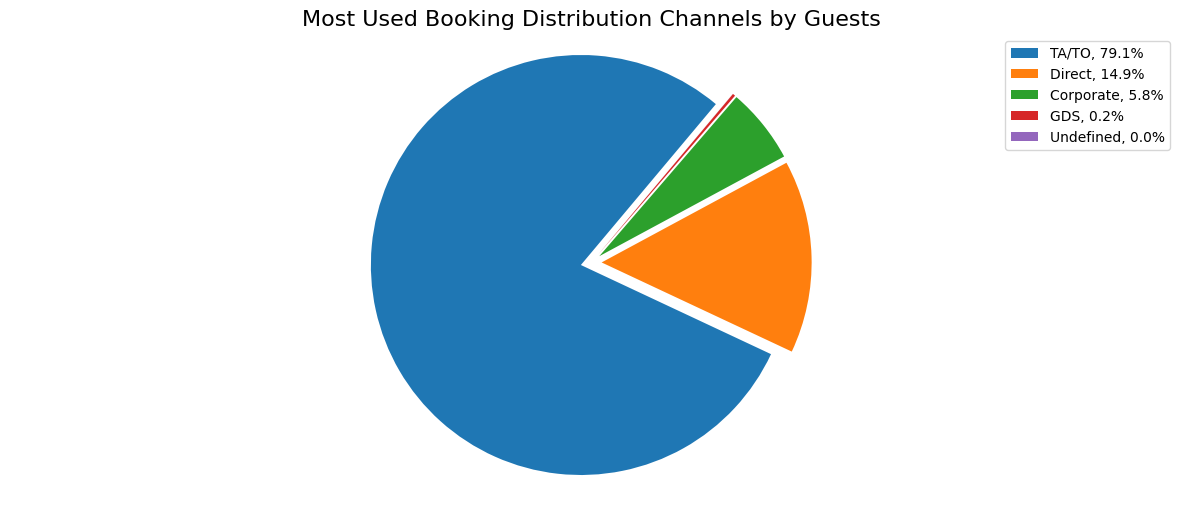

In [28]:
# Visualization code
# Creating a datset of distribution channel name and count

dist_df = hb_df['distribution_channel'].value_counts().reset_index()

# Renaming the columns to approproiate names
dist_df = dist_df.rename(columns={'count': 'channel_count'})

# Creating a explode data
my_explode = (0.05,0.05,0.05,0.05,0.05)

#adding percentage columns to the distribution_channel_df
dist_df['percentage'] = round(dist_df['channel_count']*100/hb_df.shape[0],1)

# Deciding the figure size
plt.figure(figsize=(15,6))

# Plotting the chart values
plt.pie(dist_df['channel_count'], labels=None, explode=my_explode, startangle=50)

# Adding legends with percenatge using list comprehension
labels =  [f'{l}, {s}%' for l, s in zip(dist_df['distribution_channel'].value_counts().index.tolist(), dist_df['percentage'].values.tolist())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# Setting the chart title
plt.title('Most Used Booking Distribution Channels by Guests' ,fontsize = 16)

# Show the chart
plt.axis('equal')
plt.show()


1. Why did you pick the specific chart?
Pie chart is one of the best chart to visualize categoriacal data.

2. What is/are the insight(s) found from the chart?
From the above insight it is clear that TA/TO (travel agents/Tour operators) is most used distribution channel by guests.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight. Hotels can run promotional offers to motivate other channels to contribute more in bookings.

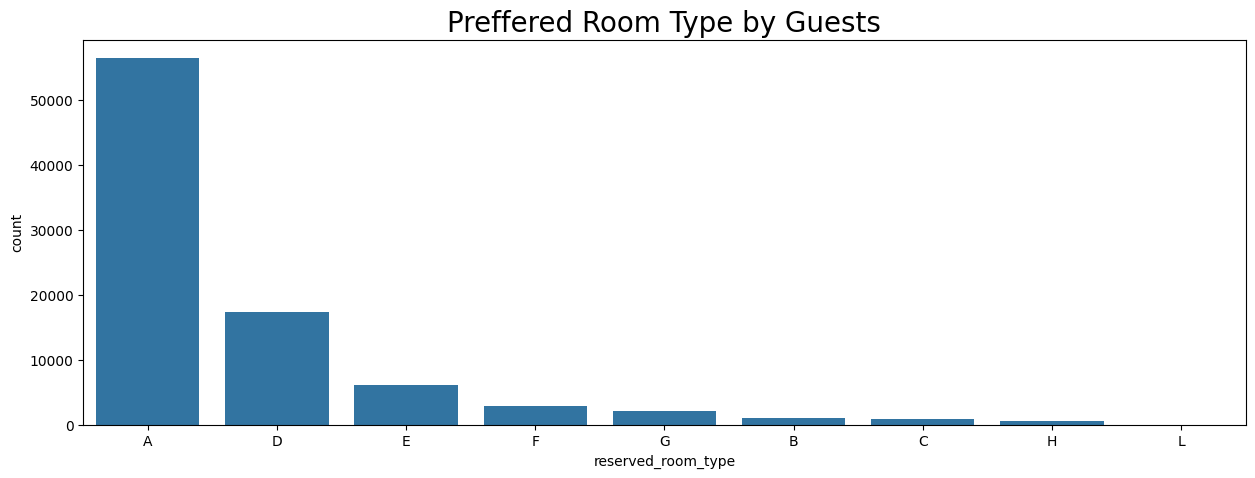

In [29]:
# Chart - 8 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values in chart
sb.countplot(x=hb_df['reserved_room_type'], order=hb_df['reserved_room_type'].value_counts().index)

# Setting the title
plt.title('Preffered Room Type by Guests', fontsize = 20)

plt.show()

1. Why did you pick the specific chart?
A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

2. What is/are the insight(s) found from the chart?
By observing the above chart we can understand that the room type A most preffered ( almost 55,000) by the guests while booking the hotel.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As it is clear that room type A is most used hotel should increase the number of A type room to maximize the revenue.

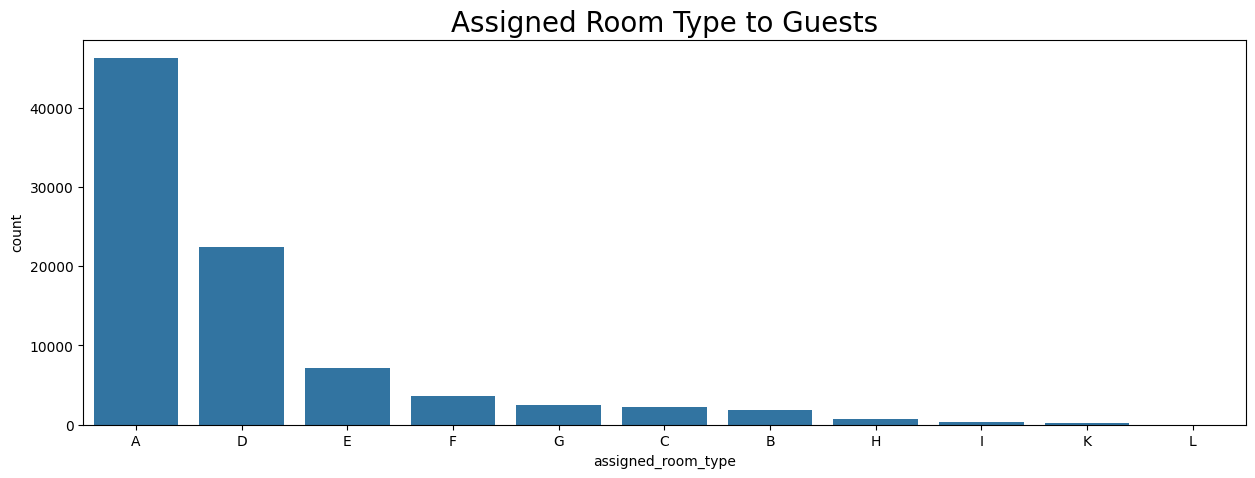

In [30]:
# Chart - 9 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values
sb.countplot(x=hb_df['assigned_room_type'], order=hb_df['assigned_room_type'].value_counts().index)

# Setting the title
plt.title('Assigned Room Type to Guests', fontsize = 20)

# show the chart
plt.show()


1. Why did you pick the specific chart?
A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

2. What is/are the insight(s) found from the chart?
From the above chart it is clear that room type A is most assigned to guests.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the 8th chart we saw that around 55,000 guests preffered room type A but 45,000 people were assigned A type room. This could be a reason to cancel the bookings. Hotel could increase A type room to decrease cancellation.

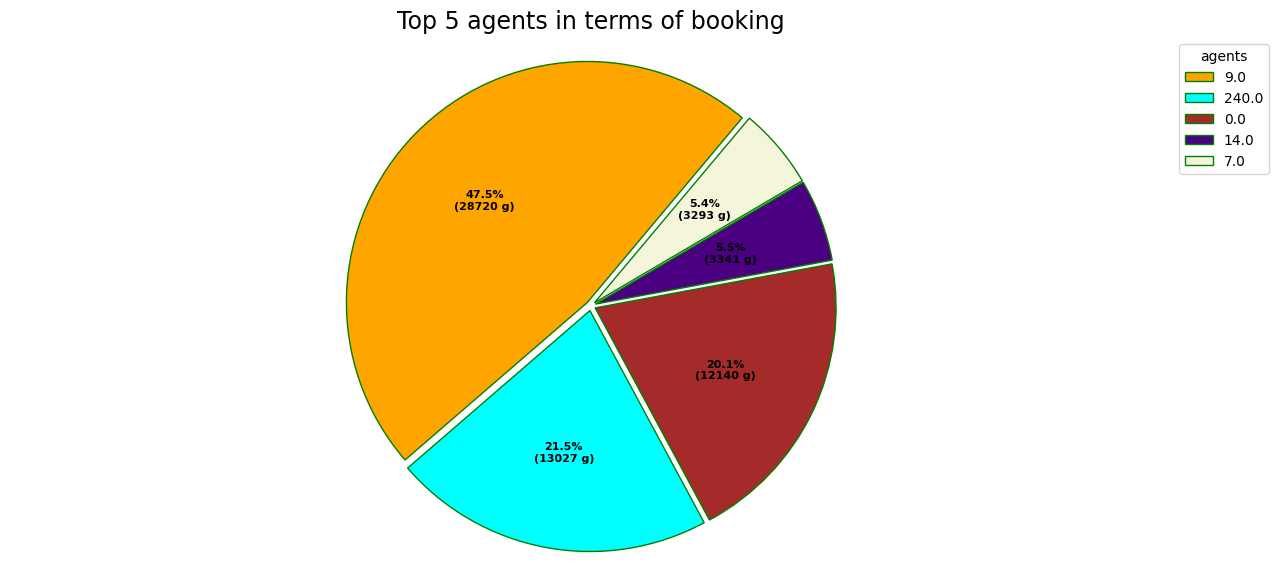

In [31]:
# Chart - 10 visualization code
# Creating a dataset by grouping by agent column and it's count
agents = hb_df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count':'Booking Count'}
                                                                                ).sort_values(by = 'Booking Count', ascending = False)

# Extracting top 5 agents by booking count
top_5 = agents[:5]

# Explosion
explode = (0.02,0.02,0.02,0.02,0.02)

# Colors
colors = ( "orange", "cyan", "brown", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Plotting the values
fig, ax = plt.subplots(figsize =(15, 7))
wedges, texts, autotexts = ax.pie(top_5['Booking Count'],
                                  autopct = lambda pct: func(pct, top_5['Booking Count']),
                                  explode = explode,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 50,
                                  wedgeprops = wp)

# Adding legend
ax.legend(wedges, top_5['agent'],
          title ="agents",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 5 agents in terms of booking", fontsize = 17)

# Show chart
plt.axis('equal')
plt.show()
     

1. Why did you pick the specific chart?
A pie chart helps organize and show data as a percentage of a whole

2. What is/are the insight(s) found from the chart?
We can see that agent number 9 has made the most number of bookings followed by agent number 240, 0, 14 and 7.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel can offer them bonus for their incredible work and to motivate them. This will help to increase the revenue.

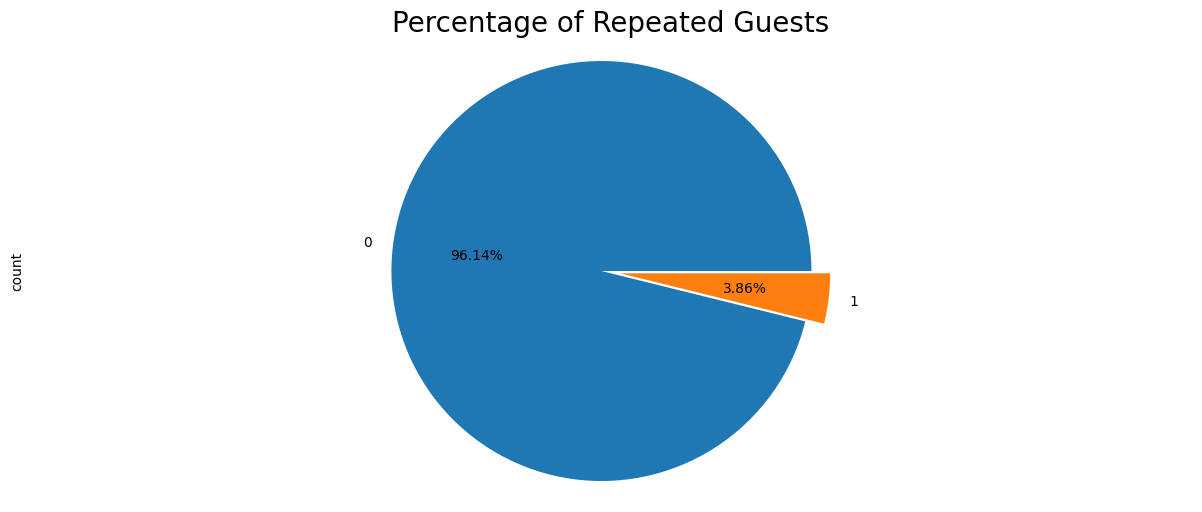

In [32]:
# Chart - 11 visualization code
# Creating a variable containing guests with their repeated counts

rep_guests = hb_df['is_repeated_guest'].value_counts()

# Plotting the values in a pie chart
rep_guests.plot.pie(autopct='%1.2f%%', explode=(0.00, 0.09), figsize=(15,6), shadow=False)

# Setting the title
plt.title('Percentage of Repeated Guests', fontsize=20)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()


1. Why did you pick the specific chart?
A pie chart helps organize and show data as a percentage of a whole

2. What is/are the insight(s) found from the chart?
From the above insight we can see that 3.86% guests are repeated guests.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that number of repeated guests is very low and it shows negative growth of the hotel. Hotel can offer loyality discount to their guests to increase repeated guests.

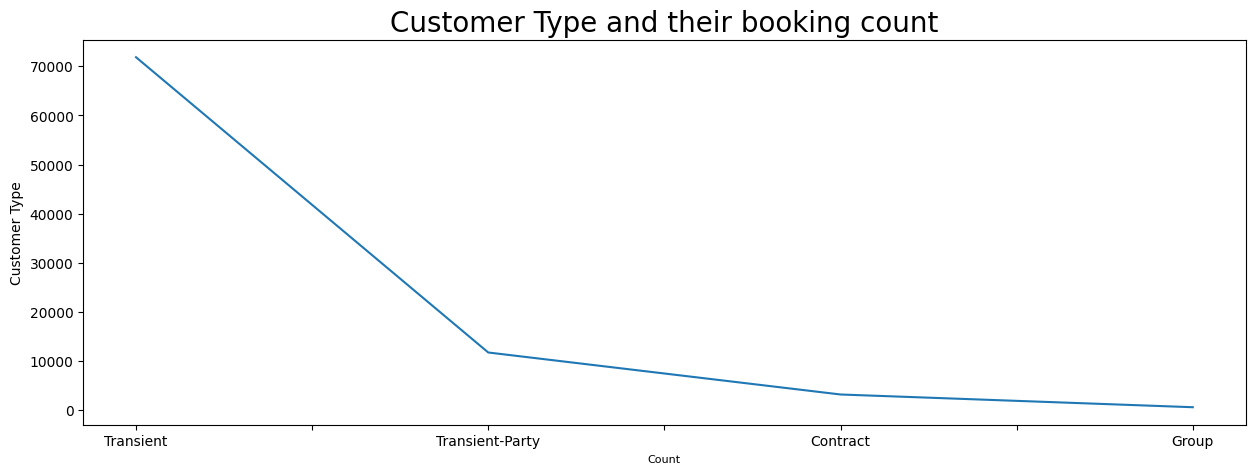

In [33]:
# Chart - 12 visualization code
cust_type = hb_df['customer_type'].value_counts()

# Plotting the values in a line chart
cust_type.plot(figsize=(15,5))

# Setting the x label , y label and title
plt.xlabel('Count', fontsize=8)
plt.ylabel('Customer Type', fontsize=10)
plt.title('Customer Type and their booking count', fontsize=20)

# Show the chart
plt.show()


1. Why did you pick the specific chart?
Line graphs are used to track changes over different categories.

2. What is/are the insight(s) found from the chart?
We can see that Transient customer type has most number of bookings.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel can run promotional offers to increase the number of bookings over other categories. such as hotel could offer discounts for groups.

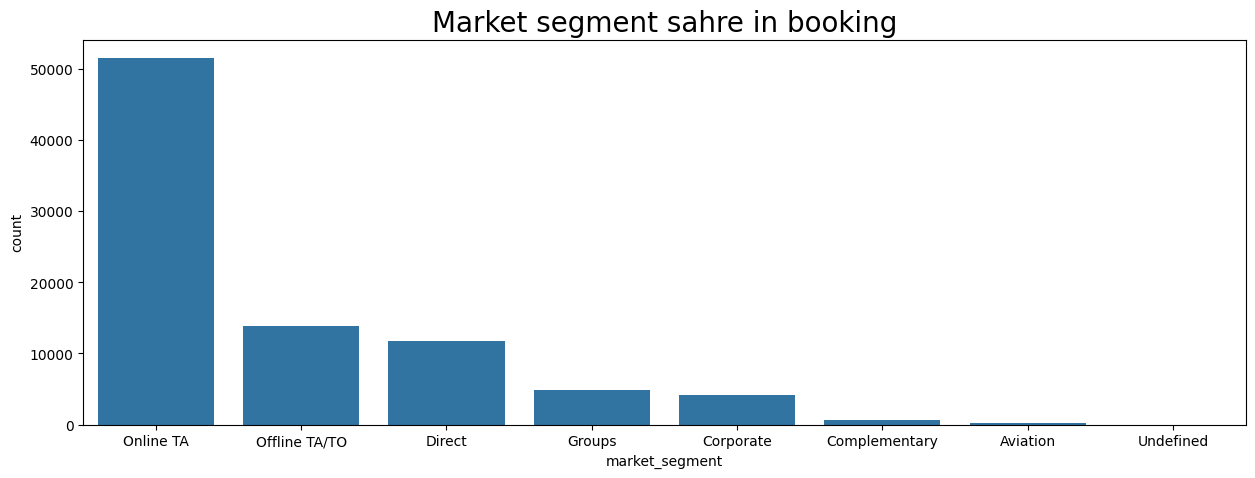

In [34]:
# Chart - 13 visualization code
plt.figure(figsize=(15,5))
sb.countplot(x=hb_df['market_segment'], order = hb_df['market_segment'].value_counts().index)
plt.title('Market segment sahre in booking', fontsize=20)
plt.show()


1. Why did you pick the specific chart?
A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

2. What is/are the insight(s) found from the chart?
Above insight shows that Online TA (Travel Agent) has the most bookings.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative growth. Hotel should come up with some great idea to increase sahre among other market segments to increase the revenue.

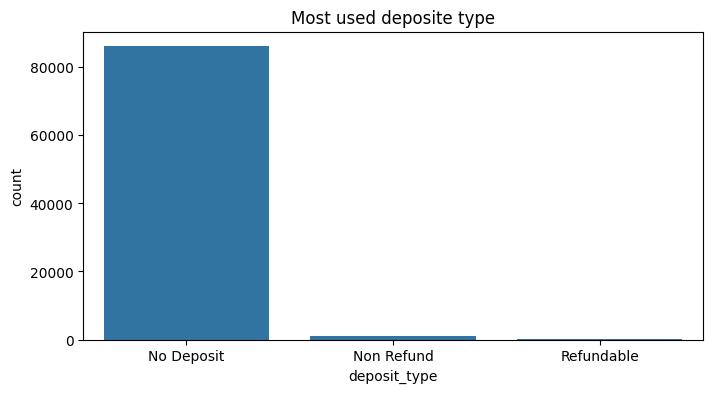

In [35]:
# Counting each deposte type
deposite = hb_df['deposit_type'].value_counts().index

# Setting the chart size
plt.figure(figsize=(8,4))

# plotting the values
sb.countplot(x=hb_df['deposit_type'], order= deposite)
plt.title('Most used deposite type')
plt.show()

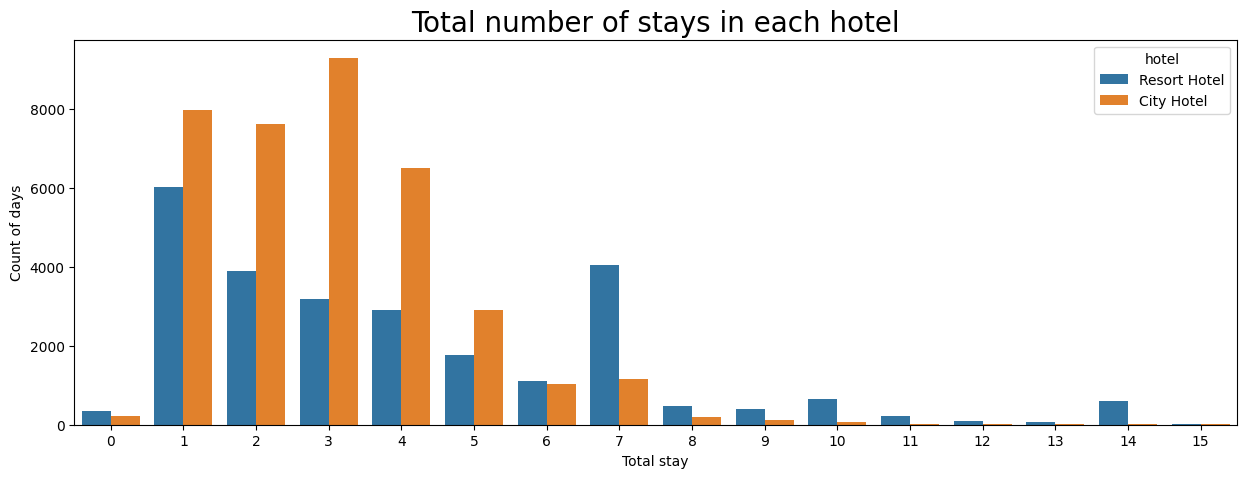

In [36]:
# Chart - 11 visualization code
# Creating a not cancelled dataframe
not_cancelled_df = hb_df[hb_df['is_canceled'] == 0]
# Creating a hotel stay dataframe
hotel_stay = not_cancelled_df[not_cancelled_df['total_stay'] <= 15]  #Visualizing pattern till 15days stay


# Setting plot size and plotting barchart
plt.figure(figsize = (15,5))
sb.countplot(x = hotel_stay['total_stay'], hue = hotel_stay['hotel'])

# Adding the label of the chart
plt.title('Total number of stays in each hotel',fontsize = 20)
plt.xlabel('Total stay')
plt.ylabel("Count of days")
plt.show()

From the above chart we can see that in City hotel most people stay for 3 days and in Resort hotel most people stay for only 1 day.

Hotel should work on to increase total stay in Resort hotel to increase revenue.

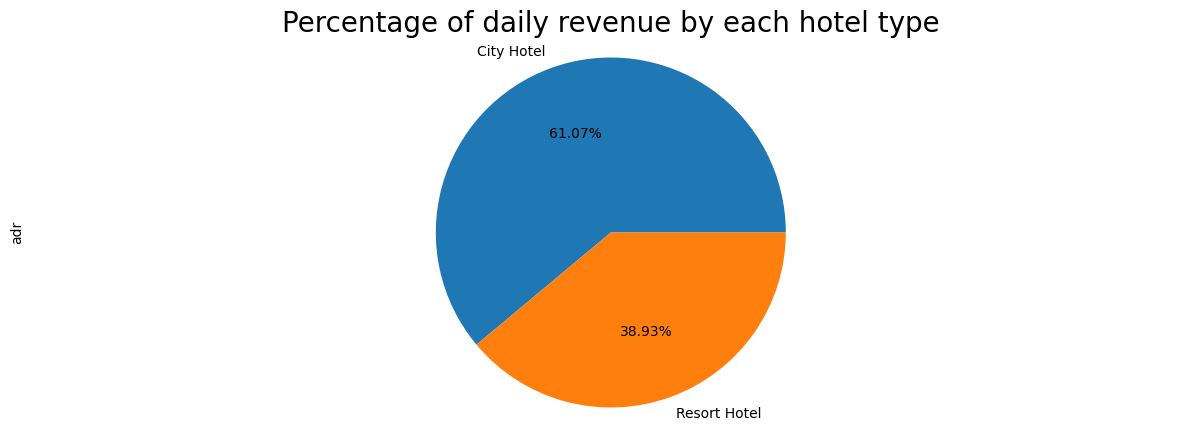

In [37]:
# Counting the revnue for each hotel type using groupby function
most_rev = hb_df.groupby('hotel')['adr'].count()

# Plotting the values in a pie chart
most_rev.plot.pie(autopct='%1.2f%%', figsize=(15,5))

# Setting the title
plt.title('Percentage of daily revenue by each hotel type', fontsize=20)
plt.axis('equal')

# Show the chart
plt.show()

From the above insight it is clear that City hotel has more share in revenue generation over Resort Hotel.

Stake holderscould improve the service of Resort hotel so that people stay more in resort hotel and increase the revenue.

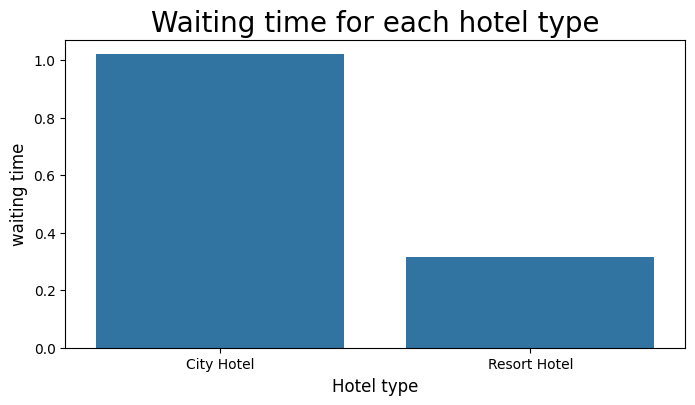

In [38]:
# Grouping by hotel and taking the mean of days in waiting list
waiting_time_df = hb_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# Waiting_time_df

# Setting the plot size
plt.figure(figsize=(8,4))

# Plotting the barchart
sb.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

# Setting the labels
plt.xlabel('Hotel type',fontsize=12)
plt.ylabel('waiting time',fontsize=12)
plt.title("Waiting time for each hotel type",fontsize=20)

# Show chart
plt.show()

Above chart shows that City hotel has more waiting period. This could be because people stay more in City hotel as we saw in previous insight.

Stakeholders should increase rooms in City hotel or convert some of rooms of Resort hotel into City Hotel to decrease the waiting time.

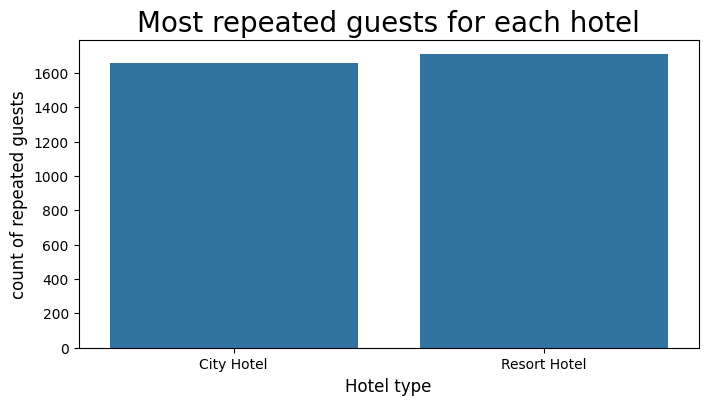

In [39]:
# Grouping hotel types on repeated guests
rep_guest = hb_df[hb_df['is_repeated_guest']==1].groupby('hotel').size().reset_index()

# Renaming the column
rep_guest = rep_guest.rename(columns={0:'number_of_repated_guests'})

# Setting the chart size
plt.figure(figsize=(8,4))

# Plotting the values in a bar chart
sb.barplot(x=rep_guest['hotel'],y=rep_guest['number_of_repated_guests'])

# Setting the labels and title
plt.xlabel('Hotel type', fontsize=12)
plt.ylabel('count of repeated guests', fontsize=12)
plt.title('Most repeated guests for each hotel', fontsize=20)

# Show Chart
plt.show()


We can see that Resort Hotel has slightly more repeated guests over City Hotel this could be because of less waiting time in Resort Hotel and better service there because of less rush.

In [40]:
# Grouping arrival_month and hotel on mean of adr
bookings_months=hb_df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
bookings_months['arrival_date_month']=pd.Categorical(bookings_months['arrival_date_month'],categories=months,ordered=True)

# Sorting the months
bookings_months=bookings_months.sort_values('arrival_date_month')
bookings_months

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


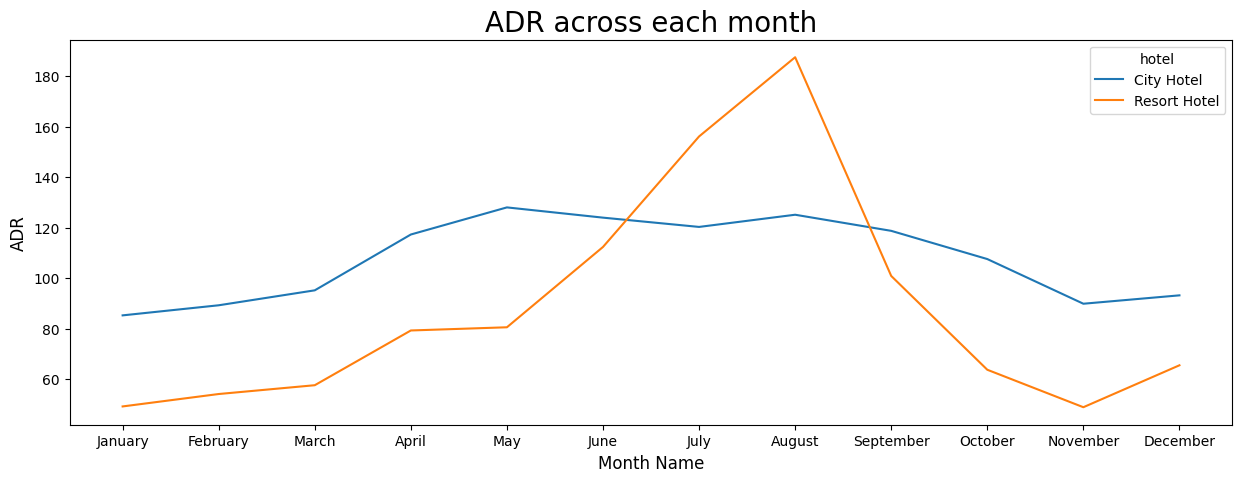

In [41]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sb.lineplot(x=bookings_months['arrival_date_month'],y=bookings_months['adr'],hue=bookings_months['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# Show chart
plt.show()

City Hotel : It is clear that City Hotel generates more revenue in May months in comparison to other months.

Resort Hotel : Resort Hotel generates more revenue in between July and August months.

Stakeholders could prepare in advance for these 2 months as these 2 months generate more revenue.

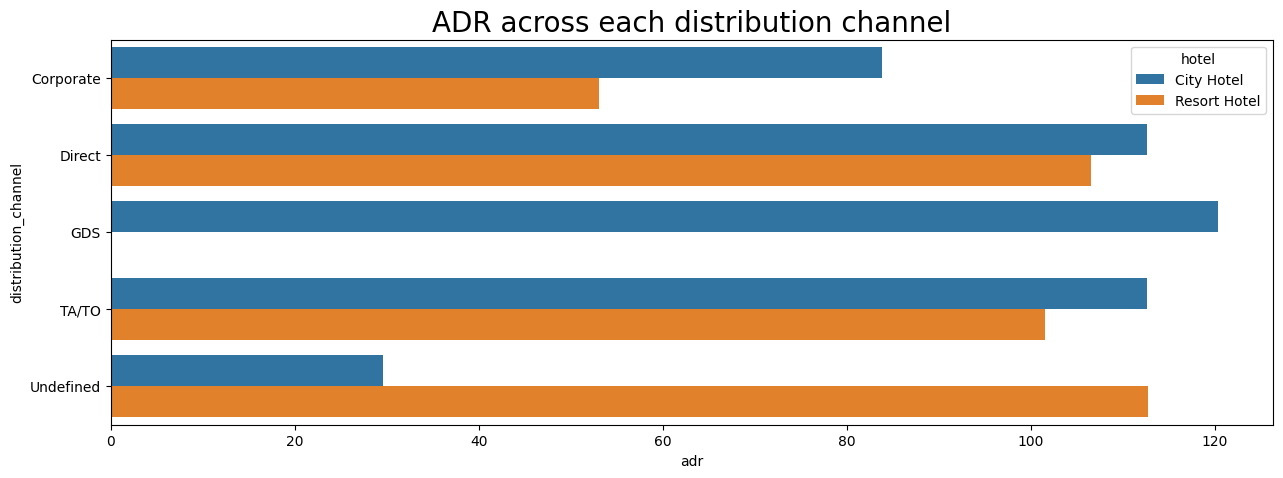

In [42]:
# Grouping dist_channel and hotels on their adr
dist_channel_adr = hb_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# Setting the figure size
plt.figure(figsize=(15,5))

# Creating a horizontal bar chart
sb.barplot(x='adr', y='distribution_channel', data=dist_channel_adr, hue='hotel')

# Setting the title
plt.title('ADR across each distribution channel', fontsize=20)

# Show chart
plt.show()

GDS has contributed more in generating the ADR. GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

Direct- means that bookings are directly made with the respective hotels

TA/TO- means that booings are made through travel agents or travel operators.

Undefined- Bookings are undefined. may be customers made their bookings on arrival.

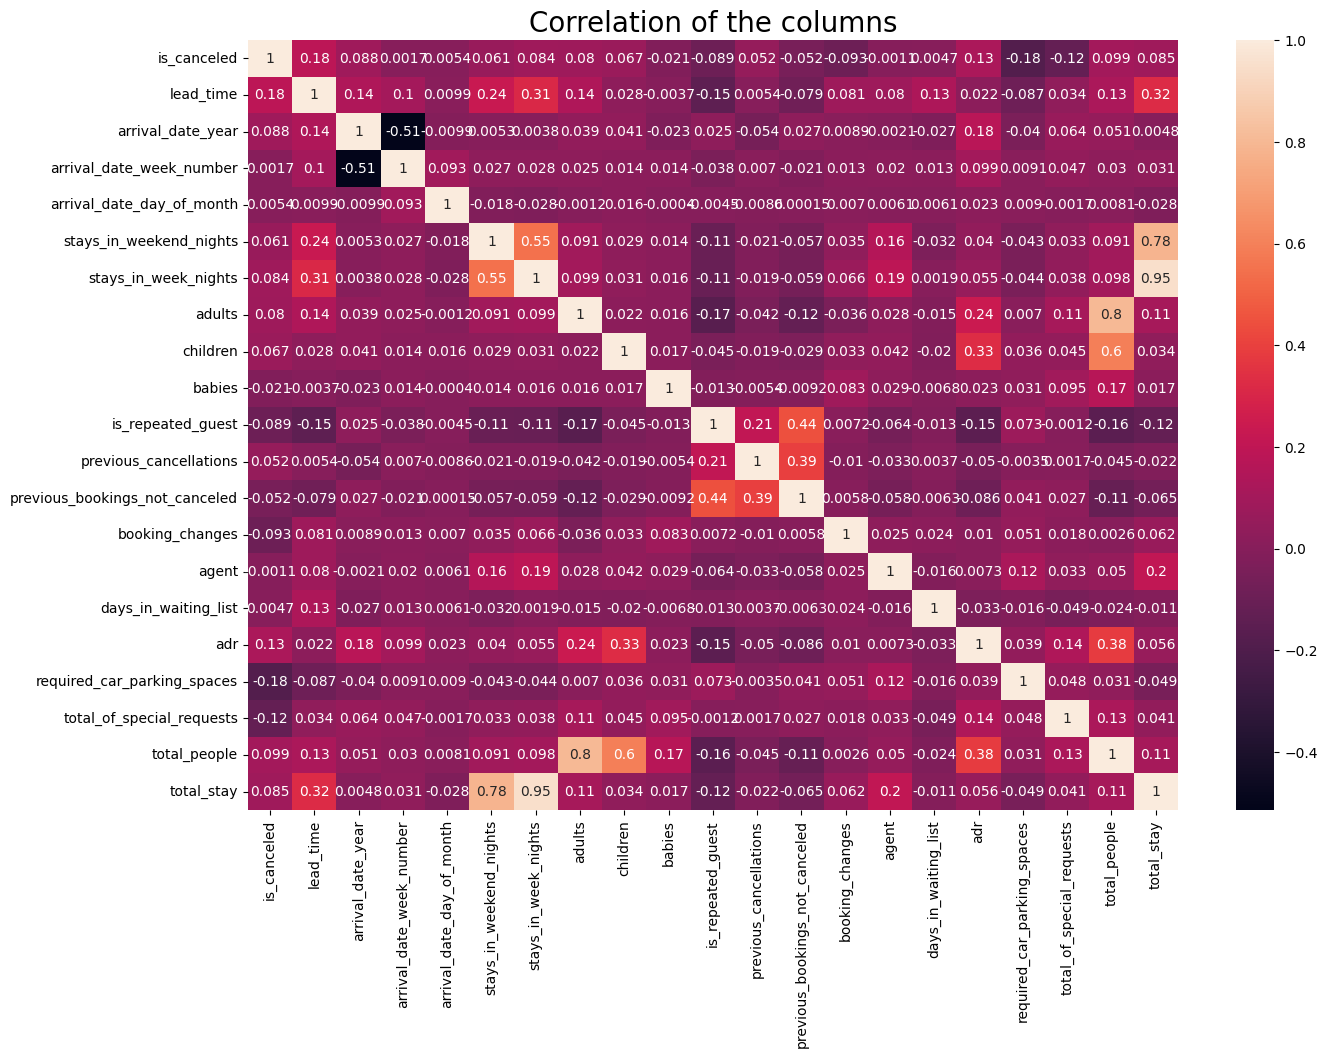

In [43]:
# Correlation Heatmap visualization code
# Setting the chart size
plt.figure(figsize=(15,10))

# Creating heatmap to see correlation of each columns
sb.heatmap(hb_df.corr(numeric_only=True),annot=True)          # Setting the numeric only colun to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize=20)

# Show heatmap
plt.show()

1. Why did you pick the specific chart?
Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

2. What is/are the insight(s) found from the chart?
lead_time and total_stay is positively corelated. that means if customers stay more then the lead time increases.
2)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

is_repeated guest and previous bookings not canceled has strong corelation. That means repeated guests don't cancel their bookings.**